# In-class exercises

Load in the merged trials datafile from the lecture. Try to do some additional analyses, and make some more plots, using this data! For instance (but feel free to try other things if you have ideas):

- First aggregate per participant. Use this data to recreate the plots we saw before (using seaborn and/or plotnine). What's different, and why?
- Try to use .pivot() from pandas to create a dataframe with one row for each participant, and a mean reaction time column for each condition. (see https://pandas.pydata.org/docs/user_guide/reshaping.html) What are the advantages/disadvantages of having your data in this format? Try to use seaborn and/or plotnine to draw a boxplot again. Why is it more difficult now?
- Using seaborn and plotnine, try to use facets/subplots to create boxplots both per participant and condition (so 3x10 = 30 boxes in total).
- Use seaborn and/or plotnine to create a violin plot!

In [1]:
import pandas as pd 
import numpy as np 

from matplotlib import pyplot as plt    
import seaborn as sns
import plotnine as gg #basically ggplot implemented in python 
from plotnine import ggplot 

In [2]:
participants = pd.read_csv("participants.csv")
trials = pd.DataFrame()
for participant_id in participants['id']:
    participant_data = pd.read_csv(f'participants/{participant_id}.csv')
    trials = trials.append(participant_data) #I have a problem with the append() function 
trials

trials.rename(columns={'Unnamed: 0': 'trial_order'}, inplace= True)
trials.to_csv('trials.csv', index = False) #remove the index from the df


C:\Users\Christina Papoutsi\AppData\Local\Temp\ipykernel_4796\351099288.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\Christina Papoutsi\AppData\Local\Temp\ipykernel_4796\351099288.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\Christina Papoutsi\AppData\Local\Temp\ipykernel_4796\351099288.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\Christina Papoutsi\AppData\Local\Temp\ipykernel_4796\351099288.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\Christina Papoutsi\AppData\Local\Temp\ipykernel_4796\351099288.py:5: FutureWarning: The frame.append method is deprecated and will be removed from 

In [3]:
participants = pd.read_csv('participants.csv')
trials = pd.read_csv('trials.csv')
# trials


merged = trials.merge(participants, on = 'id')
merged

# trials.groupby(by = 'condition'). describe() #aggregate data over variables -- this is nice if you want to have a look at your data 
summary = merged.groupby(by ='id').aggregate(
    mean_RT = pd.NamedAgg('RT', np.mean),
    std_RT = pd.NamedAgg('RT', np.std), 
    age = pd.NamedAgg('age', np.mean)
)
summary.reset_index(inplace = True)

summary

,id,mean_RT,std_RT,age
0,18045,481.933278,288.642016,18.0
1,29185,735.664829,450.815922,20.0
2,30917,357.286818,207.501049,27.0
3,39833,499.984697,342.146332,28.0
4,52826,380.812642,231.231605,33.0
5,54916,415.126416,208.590380,28.0
6,76798,483.566373,273.962894,22.0
7,83630,406.750626,237.038035,18.0
8,91033,424.164878,220.646411,25.0
9,91930,533.448513,310.988834,29.0


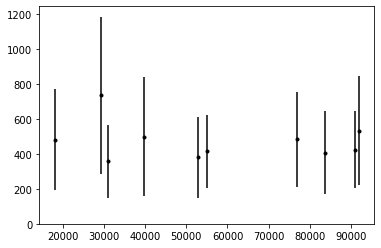

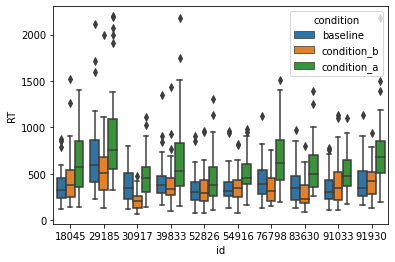

In [4]:
# First aggregate per participant. Use this data to recreate the plots we saw before (using seaborn and/or plotnine). What's different, and why?

# trials.groupby(by = 'condition'). describe() #aggregate data over variables -- this is nice if you want to have a look at your data 
summary = merged.groupby(by ='id').aggregate(
    mean_RT = pd.NamedAgg('RT', np.mean),
    std_RT = pd.NamedAgg('RT', np.std), 
    age = pd.NamedAgg('age', np.mean)
)
summary.reset_index(inplace = True)

summary


plt.figure()
plt.bar(summary['id'], summary['mean_RT'])
plt.errorbar(summary['id'], summary['mean_RT'], summary['std_RT'], fmt = 'k.')
plt.show()



sns.boxplot(x = 'id', y='RT', hue = 'condition', data = trials)
plt.show()


In [5]:
# - Try to use .pivot() from pandas to create a dataframe with one row for each participant, and a mean reaction time column for each condition. 
# (see https://pandas.pydata.org/docs/user_guide/reshaping.html) What are the advantages/disadvantages of having your data in this format? 
# Try to use seaborn and/or plotnine to draw a boxplot again. Why is it more difficult now?


pivoted = df.pivot_table(index = 'RT',
columns = 'condition',
values =   'id')

pivoted 



NameError: name 'df' is not defined

In [ ]:
# - Using seaborn and plotnine, try to use facets/subplots to create boxplots both per participant and condition (so 3x10 = 30 boxes in total).


In [ ]:
# - Use seaborn and/or plotnine to create a violin plot!